In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Loading Dataset**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Data/learning_data(learning_data).csv')
data.head()

,student_id,age,gender,course_type,session_count,avg_session_duration,quiz_attempts,assignments_submitted,satisfaction_rating,dropout
0,S0001,24,Male,UI/UX,11,108.13,7,5,5,0
1,S0002,37,Male,Python,9,59.51,3,1,1,1
2,S0003,32,Male,UI/UX,15,81.77,3,3,1,1
3,S0004,28,Female,Digital Marketing,7,24.82,4,4,1,1
4,S0005,25,Female,Digital Marketing,5,27.11,7,1,4,1


**Checking Null values and Description of data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             200 non-null    object 
 1   age                    200 non-null    int64  
 2   gender                 200 non-null    object 
 3   course_type            200 non-null    object 
 4   session_count          200 non-null    int64  
 5   avg_session_duration   200 non-null    float64
 6   quiz_attempts          200 non-null    int64  
 7   assignments_submitted  200 non-null    int64  
 8   satisfaction_rating    200 non-null    int64  
 9   dropout                200 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 15.8+ KB


In [6]:
data.describe()

,age,session_count,avg_session_duration,quiz_attempts,assignments_submitted,satisfaction_rating,dropout
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,27.850000,14.415000,59.160200,4.320000,2.380000,3.090000,0.485000
std,6.422127,8.898804,31.797223,2.865073,1.720582,1.411332,0.501029
min,18.000000,0.000000,7.310000,0.000000,0.000000,1.000000,0.000000
25%,22.000000,6.750000,30.850000,2.000000,1.000000,2.000000,0.000000
50%,27.500000,15.000000,58.160000,4.000000,2.000000,3.000000,0.000000
75%,33.000000,22.000000,87.230000,7.000000,4.000000,4.000000,1.000000
max,39.000000,29.000000,118.850000,9.000000,5.000000,5.000000,1.000000


**No null values , moving forward for the encoding:Label encoding**

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

**Checking the object values , encoded or not**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             200 non-null    int64  
 1   age                    200 non-null    int64  
 2   gender                 200 non-null    int64  
 3   course_type            200 non-null    int64  
 4   session_count          200 non-null    int64  
 5   avg_session_duration   200 non-null    float64
 6   quiz_attempts          200 non-null    int64  
 7   assignments_submitted  200 non-null    int64  
 8   satisfaction_rating    200 non-null    int64  
 9   dropout                200 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 15.8 KB


**Seperating the target vector and Standardizing the  numerical features**

In [12]:
X = data.drop('dropout',axis=1)
y = data['dropout']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Spliting the dataset**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Using the random Forest Classifier  for the ML model**

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Predicting**

In [17]:
y_pred = model.predict(X_test)

**Model Evaluation**

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[17  6]
 [ 2 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.71      0.88      0.79        17

    accuracy                           0.80        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.82      0.80      0.80        40

Accuracy Score: 0.8


**Plotting the confusion Matrix for the evaluation**

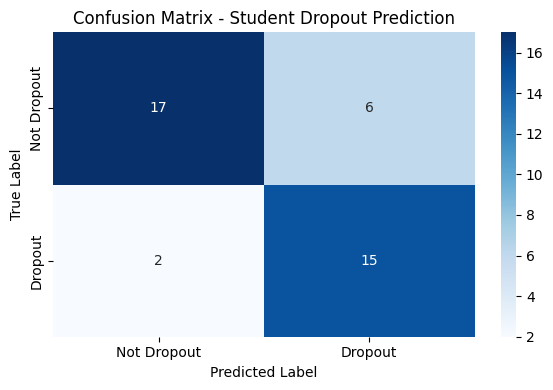

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Dropout', 'Dropout'],
            yticklabels=['Not Dropout', 'Dropout'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Student Dropout Prediction')
plt.tight_layout()
plt.show()